# Assignment 2

In this assignment, we will start with utilizing Sci-Kit learn to implement a linear regression model similar to what we did in Assignment 1. Afterwards, we will be dropping Sci-Kit learning and implementing these algorithms from scratch without the use of machine learning libraries. While you would likely never have to implement your own linear regression algorithm from scratch in practice, such a skill is valuable to have as you progress further into the field and find many scenarios where you actually may need to perform such implementations manually. Additionally, implementing algorithms from scratch will help you better understand the underlying mathematics behind each model.     

## Import Libraries

We will be using the following libraries for this homework assignment. For the questions requiring manual implementation, the pre-existing implementations from Sci-Kit Learn should *not* be used.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import operator
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

## Preparing Data

The file named **dataset1.csv** includes data that was generated from an n-degree polynomial with some gaussian noise. The data has 2 columns - first column is the feature (input) and the second column is its label (output). The first step is to load the data and split them into training, validation, and test sets. A reminder that the purpose of each of the splitted sets are as follows:

* **Training Set**: The sample of data used to fit the model
* **Validation Set**: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters.
* **Test Set**: The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

In the section below, we load the csv file and split the data randomnly into 3 equal sets. 

*Note that in practice, we usually aim for around a 70-20-10 split for train, valid, and test respectively, but due to limited data in our case, we will do an even split in order to have sufficient data for evaluation* 

In [18]:
# Load the data and split into 3 equal sets
data = pd.read_csv('dataset1.csv', header=None)
print("{}\n".format(data))

data = data.iloc[:, :-1]
print("integer located data:\n{}".format(data))
train, valid, test = np.split(data, [int(.33*len(data)), int(.66*len(data))])

print("train_size:{}\nvalid_size:{}\ntrain_size:{}".format(train.size,valid.size,test.size))


# We sort the data in order for plotting purposes later
train.sort_values(by=[0], inplace=True)
valid.sort_values(by=[0], inplace=True)
test.sort_values(by=[0], inplace=True)

            0          1   2
0   -0.335254  -2.953401 NaN
1    0.122457  -5.836786 NaN
2   -0.819361  -9.321124 NaN
3   -0.860443  -3.800950 NaN
4    0.422628   2.100318 NaN
5   -0.007729  -3.405798 NaN
6   -0.627858  -6.709161 NaN
7    0.962901  21.857697 NaN
8   -0.427498  -3.513751 NaN
9    0.352504  -3.073887 NaN
10   0.448782  -0.086280 NaN
11  -0.780743 -10.921434 NaN
12  -0.488943 -10.539182 NaN
13  -0.458625  -3.586555 NaN
14   0.537657   4.146147 NaN
15   0.765605  12.400646 NaN
16   0.510209  -1.062215 NaN
17  -0.283256  -6.700334 NaN
18  -0.097897  -5.630283 NaN
19   0.419778   1.357183 NaN
20   0.232616   0.908847 NaN
21  -0.184763  -5.287415 NaN
22   0.442216  -4.053938 NaN
23  -0.913618  -5.110324 NaN
24  -0.698714 -11.098282 NaN
25   0.850369  14.750550 NaN
26   0.191167  -0.802697 NaN
27  -0.073859  -6.728111 NaN
28   0.411078   5.010641 NaN
29   0.545287   3.394163 NaN
..        ...        ...  ..
120 -0.320002  -8.173860 NaN
121 -0.941586  -5.081398 NaN
122  0.960034 

Let's take a look at what our data looks like

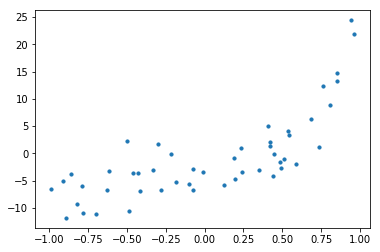

In [3]:
plt.scatter(train[0], train[1], s=10)
plt.show()

Let's apply a linear regression model using Sci-Kit learn and see what the results look like.

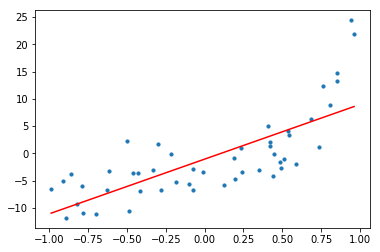

In [4]:
# Reshape arrays since sci-kit learn only takes in 2D arrays
train_x = np.array(train[0])
train_y = np.array(train[1])
valid_x = np.array(valid[0])
valid_y = np.array(valid[1])
train_x = train_x.reshape(-1, 1)
train_y = train_y.reshape(-1, 1)
valid_x = valid_x.reshape(-1, 1)
valid_y = valid_y.reshape(-1, 1)

# Apply linear regression model
model = LinearRegression()
model.fit(train_x, train_y)
y_pred = model.predict(train_x)

# Plot the results
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_pred, color='r')
plt.show()

By analyzing the line of best fit above, we can see that a straight line is unable to capture the patterns of the data. This is an example of underfitting. As seen in the latest lecture, we can generate a higher order equation by adding powers of the original features as new features. 

The linear model,: 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $y(x)$ = $w_1 x$ + $w_0$ ** 

can be transformed to a polynomial model such as:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $y(x)$ = $w_2 x^2$ + $w_1 x$ + $w_0$ ** 

Note that this is still considered to be linear model as the coefficients/weights associated with the features are still linear. x<sup>2</sup> is only a feature. However the curve that we would be fitting in this case is quadratic in nature.

Below we show an example of a quadratic curve being fit to the data

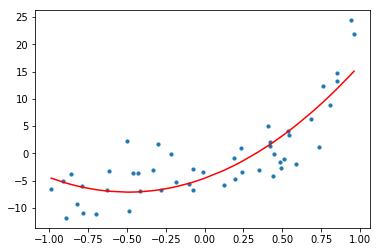

In [5]:
# Create polynomial features with degree 2
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(train_x)

# Apply linear regression
model = LinearRegression()
model.fit(x_poly, train_y)
y_poly_pred = model.predict(x_poly)

# Plot the results
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_poly_pred, color='r')
plt.show()

As you can see, we get a slightly better fit with a quadratic curve. Let's use the model to make predictions on our validation set and compute the mean squared error, which is the error which we wish to minimize.

Mean Squared Error: 20.485214511024232


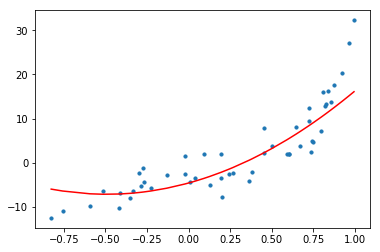

In [6]:
# Make predictions using pretrained model
valid_y_poly_pred = model.predict(polynomial_features.fit_transform(valid_x))

# Calculate root mean squared error
mse = mean_squared_error(valid_y, valid_y_poly_pred)
print("Mean Squared Error: {}".format(mse))

# Plot the prediction results
plt.scatter(valid_x, valid_y, s=10)
plt.plot(valid_x, valid_y_poly_pred, color='r')
plt.show()

## Question 1: Polynomial Regression Using Sci-Kit Learn

Now it is your turn! Following the same format as above, implement a 10-degree polynomial regression model on the training data and plot your results. Use your model to predict the output of the validation set and calculate the mean square error. Report and plot the results. 

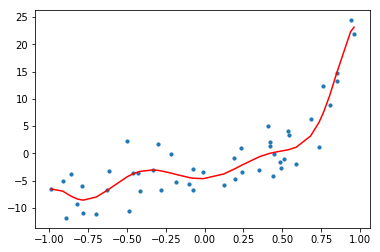

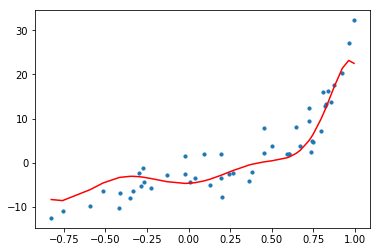

Mean Squared Error of the new 10 degree polynomial prediction: 13.115190778263617


In [7]:
### YOUR CODE HERE - Fit a 10-degree polynomial using Sci-Kit Learn
ten_poly_features = PolynomialFeatures(degree=10)
x_ten_poly = ten_poly_features.fit_transform(train_x)
model.fit(x_ten_poly,train_y)
y_ten_poly_pred = model.predict(x_ten_poly)


### YOUR CODE HERE - Plot your the curve on the training data set
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_ten_poly_pred, color='r')
plt.show()

### YOUR CODE HERE - Use model to predict output of validation set
x_ten_poly_valid = ten_poly_features.fit_transform(valid_x)
y_ten_poly_pred_valid = model.predict(x_ten_poly_valid)


### YOUR CODE HERE - Calculate the RMSE. Report and plot the curve on the validation set.
plt.scatter(valid_x,valid_y,s=10)
plt.plot(valid_x, y_ten_poly_pred_valid, color='r')

plt.show()

mse = mean_squared_error(valid_y, y_ten_poly_pred_valid)
print("Mean Squared Error of the new 10 degree polynomial prediction: {}".format(mse))


#### Did the root mean squared error go up or down as compared to the 2-degree polynomial curve? Why do you think this is the case?

With a 2 degree polynomial, we were only able to fit a quadratic curve to the set of points in the form of a "U" shape. In comparison to a 10 degree, we are able to create a variety of curves that will be tailored to better fit the data. As a result, the RMSE went down in comparison to the 2-degree polynomial because the 10 degree curve allows for a better creation of a line that will adapt the curves to the data. 

Now repeat the above for a 20-degree polynomial regression model.

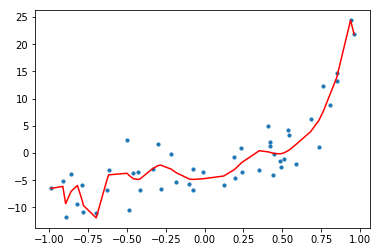

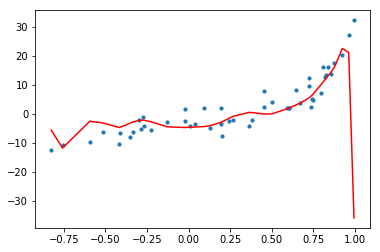

Mean Squared Error of the new 10 degree polynomial prediction: 106.08567940268014


In [8]:
### YOUR CODE HERE - Fit a 20-degree polynomial using Sci-Kit Learn
ten_poly_features = PolynomialFeatures(degree=20)
x_ten_poly = ten_poly_features.fit_transform(train_x)
model.fit(x_ten_poly,train_y)
y_ten_poly_pred = model.predict(x_ten_poly)


### YOUR CODE HERE - Plot your the curve on the training data set
plt.scatter(train_x, train_y, s=10)
plt.plot(train_x, y_ten_poly_pred, color='r')
plt.show()

### YOUR CODE HERE - Use model to predict output of validation set
x_ten_poly_valid = ten_poly_features.fit_transform(valid_x)
y_ten_poly_pred_valid = model.predict(x_ten_poly_valid)


### YOUR CODE HERE - Calculate the RMSE. Report and plot the curve on the validation set.
plt.scatter(valid_x,valid_y,s=10)
plt.plot(valid_x, y_ten_poly_pred_valid, color='r')

plt.show()

mse = mean_squared_error(valid_y, y_ten_poly_pred_valid)
print("Mean Squared Error of the new 10 degree polynomial prediction: {}".format(mse))


#### How does the mean square error compare to the previous two models? Why do you think this is the case?

The result is worse. Having more features does not necessarily mean that our line will fit the data better. In this case, our fit line is overfitting the data and so when faced with the valdation set, it does not adapt too well to the slight variations in data.

## Question 2: Manual Implementation

Now it's time to appreciate the hard work that open source developers have put, in order to allow you to implemenent machine learning models without doing any math! No more Sci-Kit learn (or any other libraries like Tensorflow, Pytorch, etc) for the rest of this assignment!

Your first step is to fit a **10-degree polynomial** to the dataset we have been using above. Then using your results, calculate the mean squared error on both the training and validation set. You may use general utility libraries like numpy and pandas matrix computations and data manipulation, but pre-existing implementations of the model itself is prohibited.

A reminder that in polynomial regression, we are looking for a solution for the equation:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $Y(X)$ = $W^T$ * $\phi(X)$ ** 

where

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $\phi(X)$ = [ $1$, $X$, $X^2$, $X^3$, ..... $X^n$ ] **
 
and the ordinary least square solution in closed form is:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;** $W$ = $(X^T X)^{-1}X^TY$ **

Make sure to review the slides, do some research, and/or ask for clarification if this doesn't make sense. You must understand the underlying math before being able to implement this properly.

*Suggestion - Use the original pandas dataframes variables named train, valid, and test instead of the reshaped arrays that were used specifically for Sci-Kit Learn. It will make your computations cleaner and more inuitive.*

Train set RMS Error: 8.60066434175744


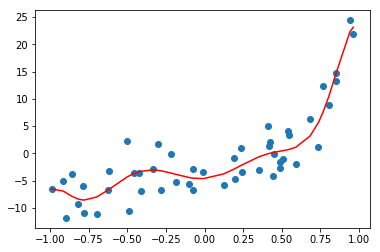

Validation set RMS Error: 6.996478361175605


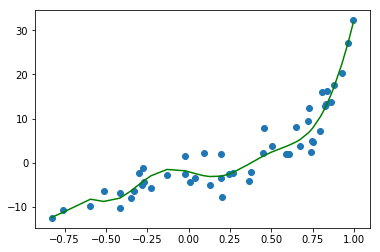

In [9]:
# Generating the 10 degree polynomial
def gen_poly_matrix(X, poly=0):
    return np.array([np.array(X**exp) for exp in range(0,poly+1)]).T

phi=gen_poly_matrix(train[0],10)


# Determining the weight matrix
def gen_w_matrix(X,Y):
    #Extra vars are not necessary lol... just to make it cleaner
    X_trans= X.T #transpose X
    X_square_matrix= np.matmul(X_trans,X)
    inv_X_square_matrix = np.linalg.inv(X_square_matrix)
    return np.matmul(inv_X_square_matrix,np.matmul(X_trans,Y))

W = gen_w_matrix(phi,np.array(train[1]))


def linear_y_predict(X,theta):
    return np.matmul(X,theta.T)

def rms_error(y_obs,y_pred):
    return np.sum((y_obs-y_pred)**2)/len(y_pred)


# Training RMS Error value and Graph of the line fit
y_pred = linear_y_predict(phi,W)
train_rms= rms_error(np.array(train[1]), y_pred)

print("Train set RMS Error: {}".format(train_rms))
plt.scatter(train[0],train[1])
plt.plot(train[0],y_pred,color='red')
plt.show()


# Validation RMS Error value and Graph of the line fit
phi_valid=gen_poly_matrix(valid[0],10)
W_valid = gen_w_matrix(phi_valid,np.array(valid[1]))
y_pred_valid=linear_y_predict(phi_valid,W_valid)
valid_rms = rms_error(np.array(valid[1]),y_pred_valid)

print("Validation set RMS Error: {}".format(valid_rms))
plt.scatter(valid[0],valid[1])
plt.plot(valid[0], y_pred_valid, color='green')
plt.show()


For the rest of the assignment, we will use the other dataset named **dataset2.csv**. First load the csv and split the model into train, valid, and test sets as shown earlier in the assignment.

In [10]:
# dataset2.csv and split into 3 equal sets
data_2=pd.read_csv('dataset2.csv',header=None)
train_2,valid_2,test_2 = np.split(data_2,[int(0.33*len(data_2)), int(.66*len(data_2))])

# Data Sorting
train_2.sort_values([0], inplace=True)
valid_2.sort_values([0],inplace=True)
test_2.sort_values([0],inplace=True)


train_x_2 = np.array(train_2[0]).reshape(-1,1)
train_y_2 = np.array(train_2[1]).reshape(-1,1)

valid_x_2 = np.array(valid_2[0]).reshape(-1,1)
valid_y_2 = np.array(valid_2[1]).reshape(-1,1)

test_x_2 = np.array(test_2[0]).reshape(-1,1)
test_y_2 = np.array(test_2[1]).reshape(-1,1)

Plot the data below to see what it looks like

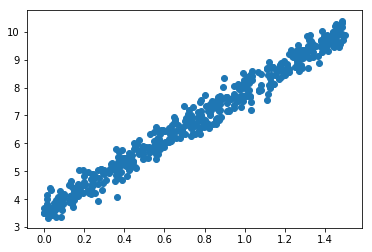

In [11]:
# Plot the points for dataset2
plt.scatter(data_2[0],data_2[1])

If done properly, you should see that the points fall under a relatively straight line with minor deviations. Looks like a perfect example to implement a linear regression model using the **gradient descent** method ..... without the use of any machine learning libraries!

Since the data falls along a straight line, we can assume the solution follows the form:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** $y(x)$ = $m x$ + $b$ **

A reminder that in gradient descent, we essentially want to iteratively get closer to the minimum of our objective function (the mean squared error), such that:
 
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** MSE($w_0$) > MSE($w_1$) > MSE($w_2$) > ...**

The algorithm is as follows:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** 1) Pick initial $w_0$ randomnly. **

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** 2) For $k=1,2..$ $\Rightarrow$ $w_{k+1}$ = $w_k$ - $\alpha$  $g(w_k)$  where $\alpha > 0$ is the learning rate and $g(w_k)$ is the gradient. **

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; ** End when | $w_k$ + $1$ - $w_k$ | < $\epsilon$ **


Make sure to review the slides, do some research, and/or ask for clarification if this doesn't make sense. There are many resources online for gradient descent. You must understand the underlying math before being able to implement this properly.

Now once you understand, it is time to implement the gradient descent below. You may set the learning rate to 1e-6 or whatever value you think is best. As usual, calculate the mean squared error and plot your results. This time, training should be done using the training and validation sets, while the final mean squared error should be computed using the testing set.

Mean Squared Error: 0.08905927548309103


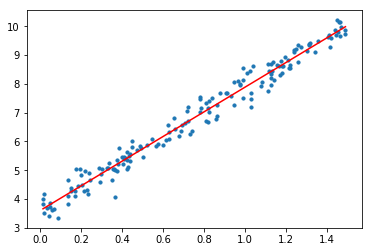

In [42]:
def calculate_grad(x, y, m, b):
    y_pred = m*x + b
    N = len(x)
    
    #side-note I used Andrew Ng's interpretation of the cost funt
    # where it is (1/2m)*Sum of (y_pred-y_act)^2 so the derivative cancels the 2
    grad_m = (-1/N) * sum(x*(y-y_pred))
    grad_b = (-1/N) * sum(y-y_pred)
    return (grad_m, grad_b)


def gradient_descent(x,y, epsilon= 10**-5, alpha=10**(-3)):
    
    #Assuming y=ax+b
    m_prev=0
    b_prev=0

    while True:    
        #calculate current gradient
        grad_m,grad_b = calculate_grad(x, y, m_prev, b_prev)

        m_cur = m_prev - alpha*grad_m
        b_cur = b_prev - alpha*grad_b

        diff = np.sqrt((m_cur-m_prev)**2 + (b_cur-b_prev)**2)
        
        #Uncomment if you want to see the distance progress
        #print("Distance between Wn and Wn-1:{}".format(diff))
        
        if (diff < epsilon):
            break

        m_prev = m_cur
        b_prev = b_cur

        
    return m_cur,b_cur


weight, beta = gradient_descent(train_x_2,train_y_2)

y_valid_2_predicted = weight*valid_x_2 + beta

#calculated MSE
mse = np.power((y_valid_2_predicted - valid_y_2),2).mean()
print("Mean Squared Error: {}".format(mse))

#plot
plt.scatter(valid_x_2, valid_y_2, s=10)
plt.plot(valid_x_2, y_valid_2_predicted, color='r')
plt.show()


## Turning In

1. Convert this notebook to a regular python file (file -> download as -> python)

2. Submit both the notebook and python file via a pull request as specified in the README